In [1]:
# import main librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:

general_data = pd.read_csv('gender_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
#Рассмотрим обучающие данние их размер структурц и значания

In [54]:
test_data.shape

(418, 11)

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Look at missing values in train data 
train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

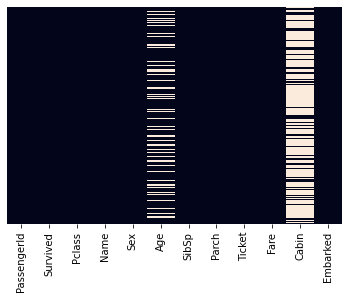

In [8]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False,)

In [9]:
features = [features for features in train_data.columns if train_data[features].isnull().sum()>1]
for feature in features:
    print(feature, np.round(train_data[feature].isnull().mean()*100, 4), '% пропцщенных знаений')

Age 19.8653 % пропцщенных знаений
Cabin 77.1044 % пропцщенных знаений
Embarked 0.2245 % пропцщенных знаений


# Много пропущенных сзначений в колонках возраст и каюта. 

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

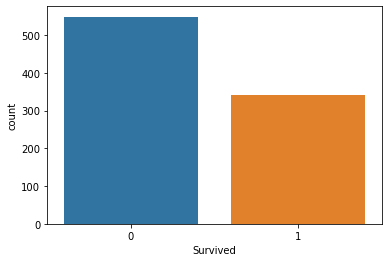

In [11]:
sns.countplot(data=train_data, x='Survived')

Общая гистограмма выжевших и погибших

<AxesSubplot:xlabel='Pclass', ylabel='count'>

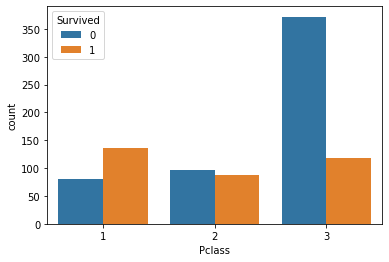

In [12]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

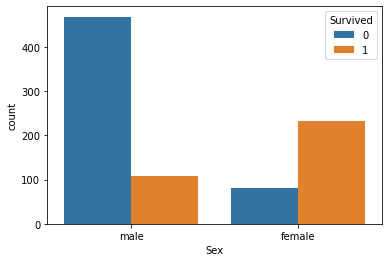

In [13]:
sns.countplot(data=train_data, x='Sex', hue='Survived')

<AxesSubplot:>

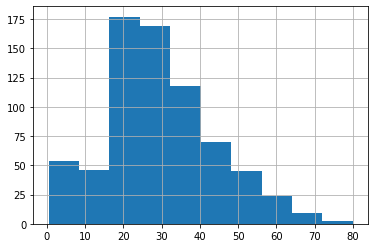

In [14]:
train_data['Age'].hist()

# Preprocessing data

In [15]:
new_train_data = train_data.copy()
new_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Pclass

In [16]:
new_train_data.groupby(by=['Pclass']).mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

# Family

In [22]:
new_train_data['Num_relative'] = new_train_data['SibSp'] + new_train_data['Parch']

In [23]:
new_train_data.drop(columns=['SibSp', 'Parch'], inplace=True)

<AxesSubplot:xlabel='Num_relative', ylabel='count'>

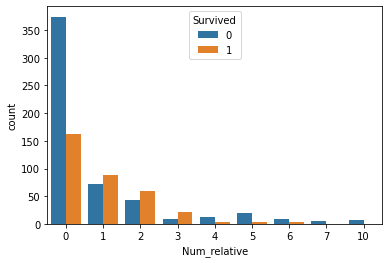

In [27]:
sns.countplot(data=new_train_data, x='Num_relative', hue='Survived')

We can cotigorize them into 2 group, when survived > unsurvived

In [32]:
def cate_family(x):
    if x == 0 or x >3:
        return 0
    else:
        return 1
        

In [34]:
new_train_data['Num_relative'] = new_train_data['Num_relative'].apply(lambda x:cate_family(x))

<AxesSubplot:xlabel='Num_relative', ylabel='count'>

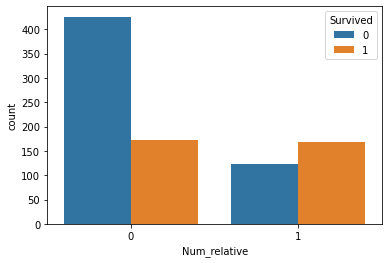

In [35]:
sns.countplot(data=new_train_data, x='Num_relative', hue='Survived')

# Age

In [17]:
new_train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
# Заменим пропущенные значения возраста, рандомными значениями из промежутка 25 - 75 перцетнлей.
first_p = new_train_data['Age'].describe()["25%"]
third_p = new_train_data['Age'].describe()["75%"]

In [19]:
new_train_data['Age'].fillna(np.random.randint(first_p,third_p), inplace=True)

In [80]:
new_train_data['Age'].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

22.0

In [21]:
new_train_data['Age'].isnull().sum()

0

# Fare

In [37]:
new_train_data.drop(columns=['Fare'],inplace=True)

# Cabin

In [40]:
new_train_data['Cabin'] = new_train_data['Cabin'].fillna(0)
new_train_data['Cabin'] = new_train_data['Cabin'].apply(lambda x: 1 if x != 0 else 0)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

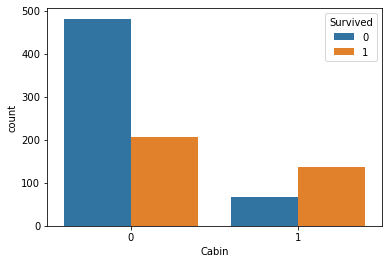

In [41]:
sns.countplot(data=new_train_data,x='Cabin',hue='Survived')

# Name

In [43]:
new_train_data.drop(columns=['Name'], inplace=True)

# Embarked

In [45]:
new_train_data.drop(columns=['Embarked'], inplace=True)

# Ticket

In [47]:
new_train_data.drop(columns=['Ticket'], inplace=True)

# PassengerId

In [49]:
new_train_data.drop(columns=['PassengerId'], inplace=True)

# Sex

In [55]:
new_train_data['Sex'].replace({'male':0, 'female':1}, inplace=True)

In [56]:
new_train_data.head()

,Survived,Pclass,Sex,Age,Cabin,Num_relative
0,0,3,0,22.0,0,1
1,1,1,1,38.0,1,1
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,1
4,0,3,0,35.0,0,0


# Clear test data

In [78]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [84]:
def clear_data(n_data):
    data = n_data.copy()
    first_p = data['Age'].describe()["25%"]
    third_p = data['Age'].describe()["75%"]
    data['Age'].fillna(np.random.randint(first_p,third_p), inplace=True)
    data['Num_relative'] = data['SibSp'] + data['Parch']
    data['Num_relative'] = data['Num_relative'].apply(lambda x:cate_family(x))
    data['Cabin'] = data['Cabin'].fillna(0)
    data['Cabin'] = data['Cabin'].apply(lambda x: 1 if x != 0 else 0)
    data['Sex'].replace({'male':0, 'female':1}, inplace=True)
    data.drop(['PassengerId', 'Name','SibSp','Parch','Ticket','Fare','Embarked'], axis=1, inplace=True)
    return data

In [85]:
# Пока не трогать данные которые на которых нужно проверять лучшую модель
new_test_data = clear_data(test_data)
new_test_data

,Pclass,Sex,Age,Cabin,Num_relative
0,3,0,34.5,0,0
1,3,1,47.0,0,1
2,2,0,62.0,0,0
3,3,0,27.0,0,0
4,3,1,22.0,0,1
...,...,...,...,...,...
413,3,0,31.0,0,0
414,1,1,39.0,1,0
415,3,0,38.5,0,0
416,3,0,31.0,0,0


# Modeling

In [148]:
# Переделать этот модуль, разобраться с тестовой и учебной выборкой
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [144]:
X = new_train_data.drop(['Survived'], axis=1)
y = new_train_data['Survived']

In [145]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [154]:
best_models = {}

def print_best_parameters(hyperparameters, best_parameters):
    value = "Best parameters: "
    for key in hyperparameters:
        value += str(key) + ": " + str(best_parameters[key]) + ", "
    if hyperparameters:
        print(value[:-2])

def get_best_model(estimator, hyperparameters):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=estimator, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring="accuracy")
    best_model = grid_search.fit(train_X, train_y)
    best_parameters = best_model.best_estimator_.get_params()
    print_best_parameters(hyperparameters, best_parameters)
    return best_model

def evaluate_model(model, name):
    print("Accuracy score:", accuracy_score(train_y, model.predict(train_X)))
    best_models[name] = model

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Method Kmeans

In [152]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [128]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [129]:
# For cross validation use KFloid

In [130]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

In [132]:
means = []
for train, test in kf.split(new_train_data):
    #print(new_train_data.iloc[train])
    classifier.fit(X_train.iloc[train], y_train.iloc[train])
    predict = classifier.predict(X_train.iloc[test])
    curmean = np.mean(predict == y_train[test])
    means.append(curmean)
print('Сердняя вероятность: {:.1%}'.format(np.mean(means)))

Сердняя вероятность: 77.3%


In [149]:
hyperparameters = {
    'n_neighbors' : list(range(1,5)),
    'weights'     : ['uniform', 'distance'],
    'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size'   : list(range(1,10)),
    'p'           : [1,2]
}
estimator = KNeighborsClassifier()
best_model_kneighbors = get_best_model(estimator, hyperparameters)

Best parameters: n_neighbors: 4, weights: distance, algorithm: auto, leaf_size: 5, p: 1


In [155]:
evaluate_model(best_model_kneighbors.best_estimator_, 'kneighbors')

Accuracy score: 0.9161676646706587
